#Integrated project draft 1  :









*Realised By : Mouheb DHIEB , Asma SASSI , Rayen GADDOUR , Siwar MEJRI*

# Project Problematic :

How can we develop and implement a data-driven approach to significantly optimize energy consumption in 5G NR RAN networks without compromising network performance and service quality, while also aligning with sustainable development goals?



#DATA-DRIVEN APPROACHS:

Data Collection

Data Analysis and Visualization

Predictive Modeling

Optimization Algorithms

Monitoring and Feedback

# Data Cleaning / Understanding

Most of the real-world data, that the data scientist work with, are raw data, meaning that it can contain repeated, missing, and irrelevant entries of information. Hence, if this data is used in any ML/DL analysis, it will result in low accuracy or incorrect prediction. For this reason, data cleaning, also known as data cleansing, is an important technique that comes prior to any model building.







## **Reading and understanding our data**


    BS CellName RUType   Mode  Frequency  Bandwidth  Antennas   TXpower
0  B_0    Cell0  Type1  Mode2      365.0         20         4  6.875934
1  B_1    Cell0  Type2  Mode2      532.0         20         4  6.875934
2  B_2    Cell0  Type1  Mode2      365.0         20         4  6.875934
3  B_3    Cell0  Type2  Mode2      532.0         20         4  6.875934
4  B_4    Cell0  Type2  Mode2      532.0         20         4  6.875934
            Time   BS CellName      load  ESMode1  ESMode2  ESMode3  ESMode4  \
0  1/1/2023 1:00  B_0    Cell0  0.487936      0.0      0.0      0.0        0   
1  1/1/2023 2:00  B_0    Cell0  0.344468      0.0      0.0      0.0        0   
2  1/1/2023 3:00  B_0    Cell0  0.193766      0.0      0.0      0.0        0   
3  1/1/2023 4:00  B_0    Cell0  0.222383      0.0      0.0      0.0        0   
4  1/1/2023 5:00  B_0    Cell0  0.175436      0.0      0.0      0.0        0   

   ESMode5  ESMode6  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  

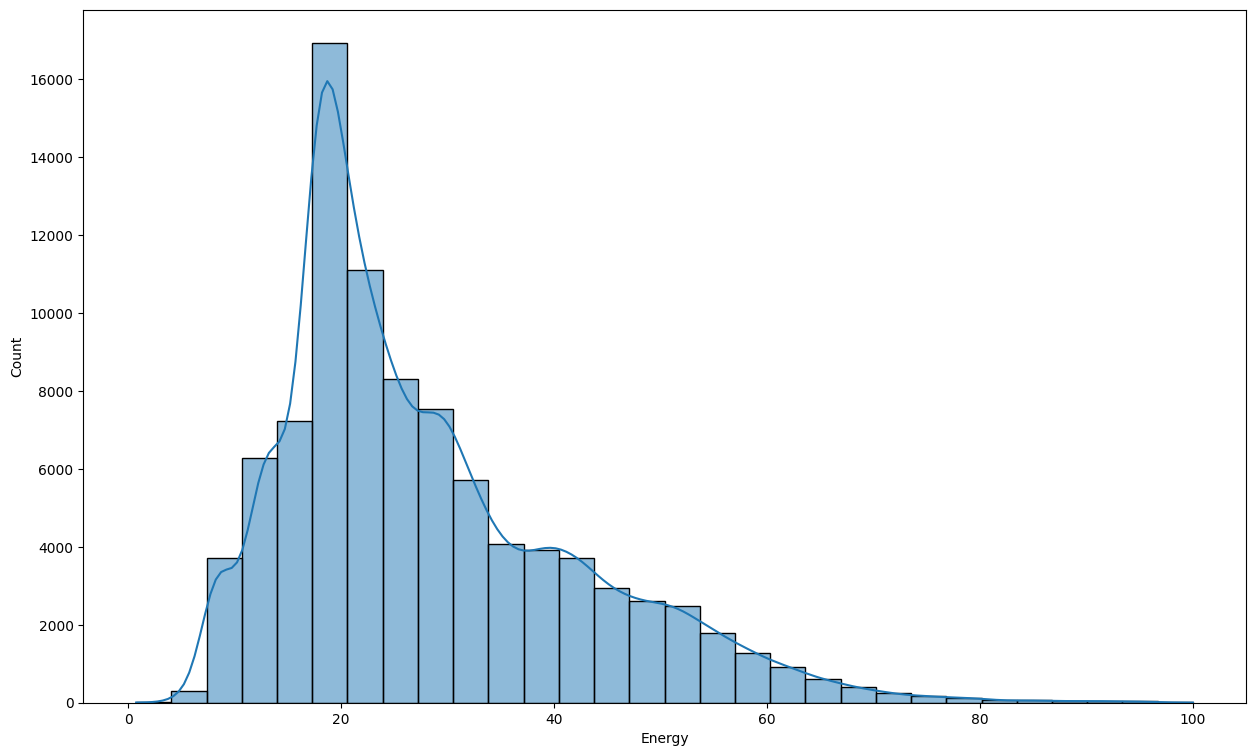

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading our datasets
base_station_info = pd.read_csv('Base_station_basic_info.csv')
cell_level_data = pd.read_csv('Cell-level_data.csv')
energy_consumption_data = pd.read_csv('Energy_consumption_data.csv')

# Displaying the first few rows of each dataset to understand their structure
print(base_station_info.head())
print(cell_level_data.head())
print(energy_consumption_data.head())

plt.figure(figsize=(15, 9))  # Increase figure size for better visibility
sns.histplot(data=energy_consumption_data, x='Energy', bins=30, kde=True)  # Adds a density estimate
plt.show()





In [2]:
# Summary statistics for numerical features
print(base_station_info.describe())
print(cell_level_data.describe())
print(energy_consumption_data.describe())

# Housing some info
housing1 = pd.read_csv('Base_station_basic_info.csv')
housing2 = pd.read_csv('Cell-level_data.csv')
housing3 = pd.read_csv('Energy_consumption_data.csv')

housing1.info()
housing2.info()
housing3.info()

         Frequency    Bandwidth     Antennas      TXpower
count  1217.000000  1217.000000  1217.000000  1217.000000
mean    408.413334    12.706656     3.908792     6.924197
std     158.536230     7.397005     9.115707     0.464575
min     155.600000     2.000000     1.000000     5.381166
25%     365.000000     8.000000     2.000000     6.576981
50%     426.980000    10.000000     2.000000     6.875934
75%     532.000000    20.000000     2.000000     7.325859
max     979.998000    20.000000    64.000000     8.375336
                load        ESMode1        ESMode2        ESMode3   ESMode4  \
count  125575.000000  125575.000000  125575.000000  125575.000000  125575.0   
mean        0.239009       0.040127       0.036722       0.000085       0.0   
std         0.235750       0.189631       0.182238       0.002437       0.0   
min         0.000000       0.000000       0.000000       0.000000       0.0   
25%         0.055080       0.000000       0.000000       0.000000       0.0   
50% 

#First data set : Base station basic info :
According to the output above, we have 1217 entries, 0 to 1216, as well as 8 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 1217 then there is no missing values for that particular feature which is our case for all of the features.

We also have a mix of numerical (2 int64 and 2 float64) and 4 object data types.

#Second data set : Cell-level data :
According to the output above, we have 125575 entries, 0 to 125574, as well as 10 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 125575 then there is no missing values for that particular feature which is our case for all of the features.


We also have a mix of numerical (1 int64 and 6 float64) and 3 object data types.


#Third data set : Energy consumption data :
According to the output above, we have 92529 entries, 0 to 92628, as well as 3 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 92629 then there is no missing values for that particular feature which is our case for all of the features.

We have numerical values (1 float64) and 2 object data types.





#Energy data understanding
In this section, we are going to inspect whether our 'Energy' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'Energy' distribution using the `distplot()` function from the `seaborn` library.


<ipython-input-3-8c417274dc0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(housing3['Energy'])


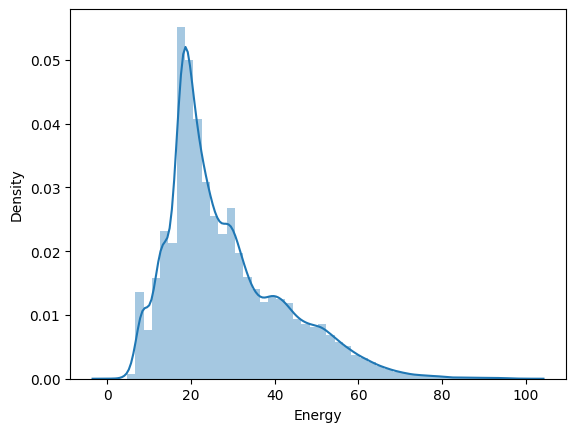

In [3]:
sp_untransformed = sns.distplot(housing3['Energy'])

As the plot shows, our 'Energy' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


#Distribution:
What it means:

In statistics, a distribution refers to how values of a particular variable are spread or dispersed across a range. When we talk about the distribution of 'Energy', we're looking at how energy consumption values are spread out—whether most of the values are clustered around a certain number, spread out evenly, or concentrated towards higher or lower ends.

#Density in the Plot:

What it is:

A density plot gives us a visual representation of the distribution of data. It shows where values are concentrated and how they taper off. The 'height' of the plot at any point gives you an idea of how many data points ( energy consumption ) fall around that value. Higher peaks mean more energy consumptions are clustered around that value.


Here, we can simply use the `skew()` function to calculate our skewness level of the `Energy`.


In [4]:
print ("skewnes of Energy cosumption: %f" % housing3['Energy'].skew())

skewnes of Energy cosumption: 1.086882


In [5]:
from scipy.stats import kurtosis

energy_kurtosis = kurtosis(housing3['Energy'], fisher=True)

print(f"Kurtosis of Energy Consumption: {energy_kurtosis}")


Kurtosis of Energy Consumption: 1.021541983439933


A positive kurtosis indicates a distribution with heavier tails and a sharper peak than the normal distribution, suggesting more frequent extreme deviations from the mean. A negative kurtosis indicates a distribution with lighter tails and a less sharp peak, suggesting fewer extreme deviations.

The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have \~1.09, so it is considered  highly skewed data.

Skewness is about whether the data leans more one way. If we say the data has a "positive skew," it means that most of the base stations use a moderate amount of energy, but there are a few that use a lot, pulling the average higher. It's like if you and your friends took a test, and most scored around 75, but one person got a 100, pulling the average score up.

Kurtosis is about the peakiness of the data distribution. Imagine the graph of our data is a mountain. If the mountain is really pointy, with most data clustered at a certain energy level, it's said to have high kurtosis. But if the mountain is flatter on top, meaning the energy usage is more spread out and not many base stations use the exact average amount, then it has low kurtosis.

In simple terms, skewness tells us if there's a direction or trend in our data leaning towards higher or lower values. At the same time, kurtosis tells us if this data is mostly bunched up around an average or spread out across many different values. Understanding these can help us get a better grasp of how energy consumption varies across base stations, which is crucial for optimizing energy use in 5G networks.







#Check for Missing values in Our data:

In [6]:
print(base_station_info.isnull().sum())
print(cell_level_data.isnull().sum())
print(energy_consumption_data.isnull().sum())



BS           0
CellName     0
RUType       0
Mode         0
Frequency    0
Bandwidth    0
Antennas     0
TXpower      0
dtype: int64
Time        0
BS          0
CellName    0
load        0
ESMode1     0
ESMode2     0
ESMode3     0
ESMode4     0
ESMode5     0
ESMode6     0
dtype: int64
Time      0
BS        0
Energy    0
dtype: int64


There is no missing values in our datasets.

#Removing Duplicates
Ensuring there are no duplicate entries that could skew our analysis.



In [7]:
base_station_info.drop_duplicates(inplace=True)
cell_level_data.drop_duplicates(inplace=True)
energy_consumption_data.drop_duplicates(inplace=True)


#Data Type Conversions
Ensure that each column is of the correct data type for analysis. For example, converting timestamps from string to datetime objects, or ensuring numerical features are treated as floats or integers.

In [8]:
# Converting 'Time' columns to datetime
cell_level_data['Time'] = pd.to_datetime(cell_level_data['Time'])
energy_consumption_data['Time'] = pd.to_datetime(energy_consumption_data['Time'])

# Ensuring numerical data is the correct type, example for 'Energy'
energy_consumption_data['Energy'] = energy_consumption_data['Energy'].astype(float)


#Initial Data Integration
For analysis that requires data from multiple sources, we need to merge these datasets. It’s crucial to identify the key(s) that will allow for accurate merging. key : BS , Time



#Step 1: Merge cell_level_data and energy_consumption_data


In [9]:
# Merging cell_level_data with energy_consumption_data on 'Time' and 'BS'
combined_data_step1 = pd.merge(cell_level_data, energy_consumption_data, on=['Time', 'BS'], how='inner')


#Step 2: Merge the Result with base_station_info


Base_station_info is time-agnostic and just contains static configurations for base stations, We only merge it on 'BS' for enriching each record in combined_data_step1 with base station configuration details:



In [10]:
# Merging the result with base_station_info on 'BS'
final_combined_data = pd.merge(combined_data_step1, base_station_info, on='BS', how='inner')


#Displaying the First Few Rows


In [11]:
print(final_combined_data.head())


                 Time   BS CellName_x      load  ESMode1  ESMode2  ESMode3  \
0 2023-01-01 01:00:00  B_0      Cell0  0.487936      0.0      0.0      0.0   
1 2023-01-01 01:00:00  B_0      Cell0  0.487936      0.0      0.0      0.0   
2 2023-01-01 02:00:00  B_0      Cell0  0.344468      0.0      0.0      0.0   
3 2023-01-01 02:00:00  B_0      Cell0  0.344468      0.0      0.0      0.0   
4 2023-01-01 03:00:00  B_0      Cell0  0.193766      0.0      0.0      0.0   

   ESMode4  ESMode5  ESMode6     Energy CellName_y RUType   Mode  Frequency  \
0        0      0.0      0.0  64.275037      Cell0  Type1  Mode2     365.00   
1        0      0.0      0.0  64.275037      Cell1  Type1  Mode2     426.98   
2        0      0.0      0.0  55.904335      Cell0  Type1  Mode2     365.00   
3        0      0.0      0.0  55.904335      Cell1  Type1  Mode2     426.98   
4        0      0.0      0.0  57.698057      Cell0  Type1  Mode2     365.00   

   Bandwidth  Antennas   TXpower  
0         20         

#Summary Information


In [12]:
final_combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Time        125690 non-null  datetime64[ns]
 1   BS          125690 non-null  object        
 2   CellName_x  125690 non-null  object        
 3   load        125690 non-null  float64       
 4   ESMode1     125690 non-null  float64       
 5   ESMode2     125690 non-null  float64       
 6   ESMode3     125690 non-null  float64       
 7   ESMode4     125690 non-null  int64         
 8   ESMode5     125690 non-null  float64       
 9   ESMode6     125690 non-null  float64       
 10  Energy      125690 non-null  float64       
 11  CellName_y  125690 non-null  object        
 12  RUType      125690 non-null  object        
 13  Mode        125690 non-null  object        
 14  Frequency   125690 non-null  float64       
 15  Bandwidth   125690 non-null  int64         
 16  An

If our final combined dataset, final_combined_data, ended up with as many entries as the largest of your original datasets (in this case, cell_level_data with 125575 entries), and the resulting entry count is 125689, which is slightly more, there is an explanation.

It indeed sounds unusual because typically, an inner merge results in a dataset size that is equal to or less than the smallest dataset involved in the merge, depending on the overlap of the key values. Here is an explanation :
# Complete Overlap of Keys:
For the final dataset to be as large as or larger than the largest initial dataset, it would mean there is a complete or nearly complete overlap of the keys used for merging (BS and Time) across the datasets. This scenario could happen if:

Every BS and Time combination in cell_level_data and energy_consumption_data has a matching pair in the other dataset. This suggests a very high degree of synchronization between the datasets regarding when the measurements were taken and recorded.
The base_station_info dataset contains all the BS values present in the cell_level_data and energy_consumption_data datasets. Given that this dataset likely provides static information about base stations, it's feasible that it covers all base stations referenced in the other datasets.


#Descriptive Statistics


In [13]:
print(final_combined_data.describe())


                                Time           load        ESMode1  \
count                         125690  125690.000000  125690.000000   
mean   2023-01-03 22:38:56.290874624       0.255324       0.030776   
min              2023-01-01 01:00:00       0.000000       0.000000   
25%              2023-01-02 10:00:00       0.061100       0.000000   
50%              2023-01-03 16:00:00       0.165860       0.000000   
75%              2023-01-05 11:45:00       0.381074       0.000000   
max              2023-01-08 00:00:00       0.993957       1.000000   
std                              NaN       0.245586       0.167031   

             ESMode2        ESMode3   ESMode4        ESMode5        ESMode6  \
count  125690.000000  125690.000000  125690.0  125690.000000  125690.000000   
mean        0.029709       0.000102       0.0       0.000011       0.040335   
min         0.000000       0.000000       0.0       0.000000       0.000000   
25%         0.000000       0.000000       0.0       0

#Sample Random Rows
Viewing a random sample of rows can help ensure that our data's representation isn't biased by the ordering in the dataset:



In [14]:
print(final_combined_data.sample(5))


                     Time     BS CellName_x     load  ESMode1  ESMode2  \
17335 2023-01-05 08:00:00  B_111      Cell0  0.19435      0.0      0.0   
77343 2023-01-03 04:00:00  B_523      Cell0  0.11408      0.0      0.0   
75753 2023-01-03 17:00:00  B_513      Cell0  0.30164      0.0      0.0   
79433 2023-01-01 04:00:00  B_537      Cell0  0.02850      0.0      0.0   
17484 2023-01-02 17:00:00  B_112      Cell0  0.56809      0.0      0.0   

       ESMode3  ESMode4  ESMode5  ESMode6     Energy CellName_y RUType   Mode  \
17335      0.0        0      0.0      0.0  37.219731      Cell1  Type1  Mode2   
77343      0.0        0      0.0      0.0  19.431988      Cell0  Type3  Mode2   
75753      0.0        0      0.0      0.0  24.663677      Cell0  Type6  Mode2   
79433      0.0        0      0.0      0.0  18.086697      Cell0  Type3  Mode2   
17484      0.0        0      0.0      0.0  77.877429      Cell0  Type1  Mode2   

       Frequency  Bandwidth  Antennas   TXpower  
17335     426.98  

This is particularly useful for our large datasets where the head() method might return rows that are not representative of the entire dataset.



#Checking for Duplicate Rows
After merging, it's wise to check for any duplicate entries that might have been introduced:



In [15]:
duplicates = final_combined_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    final_combined_data = final_combined_data.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 0


No duplicates found .

#Handling outliers
After merging our datasets, handling outliers is an important step to ensure that your data is clean and ready for modeling. Outliers can significantly affect the performance of many machine learning models, especially those sensitive to extreme values. Here's how to identify and handle outliers in your dataset.




Step 1: Identify Numeric Columns and Calculate IQR


First, we isolate the numeric columns. This is crucial because operations like calculating the IQR (Interquartile Range) only make sense for numeric data.



In [16]:
numeric_df = final_combined_data.select_dtypes(include=[np.number])


Next, calculate the IQR for these numeric columns. The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1), which helps us identify outliers as values that are significantly higher or lower than the majority of the data.



In [17]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


Step 2: Identifying Outliers

Using the IQR, outliers are defined as observations that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR. This standard rule helps in pinpointing data points that are unusually high or low.



In [18]:
outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))


Step 3: Visualization Before Outlier Removal

Before removing outliers, it's insightful to visualize them. A box plot is an effective visualization tool for this purpose, as it clearly shows the median, quartiles, and outliers.



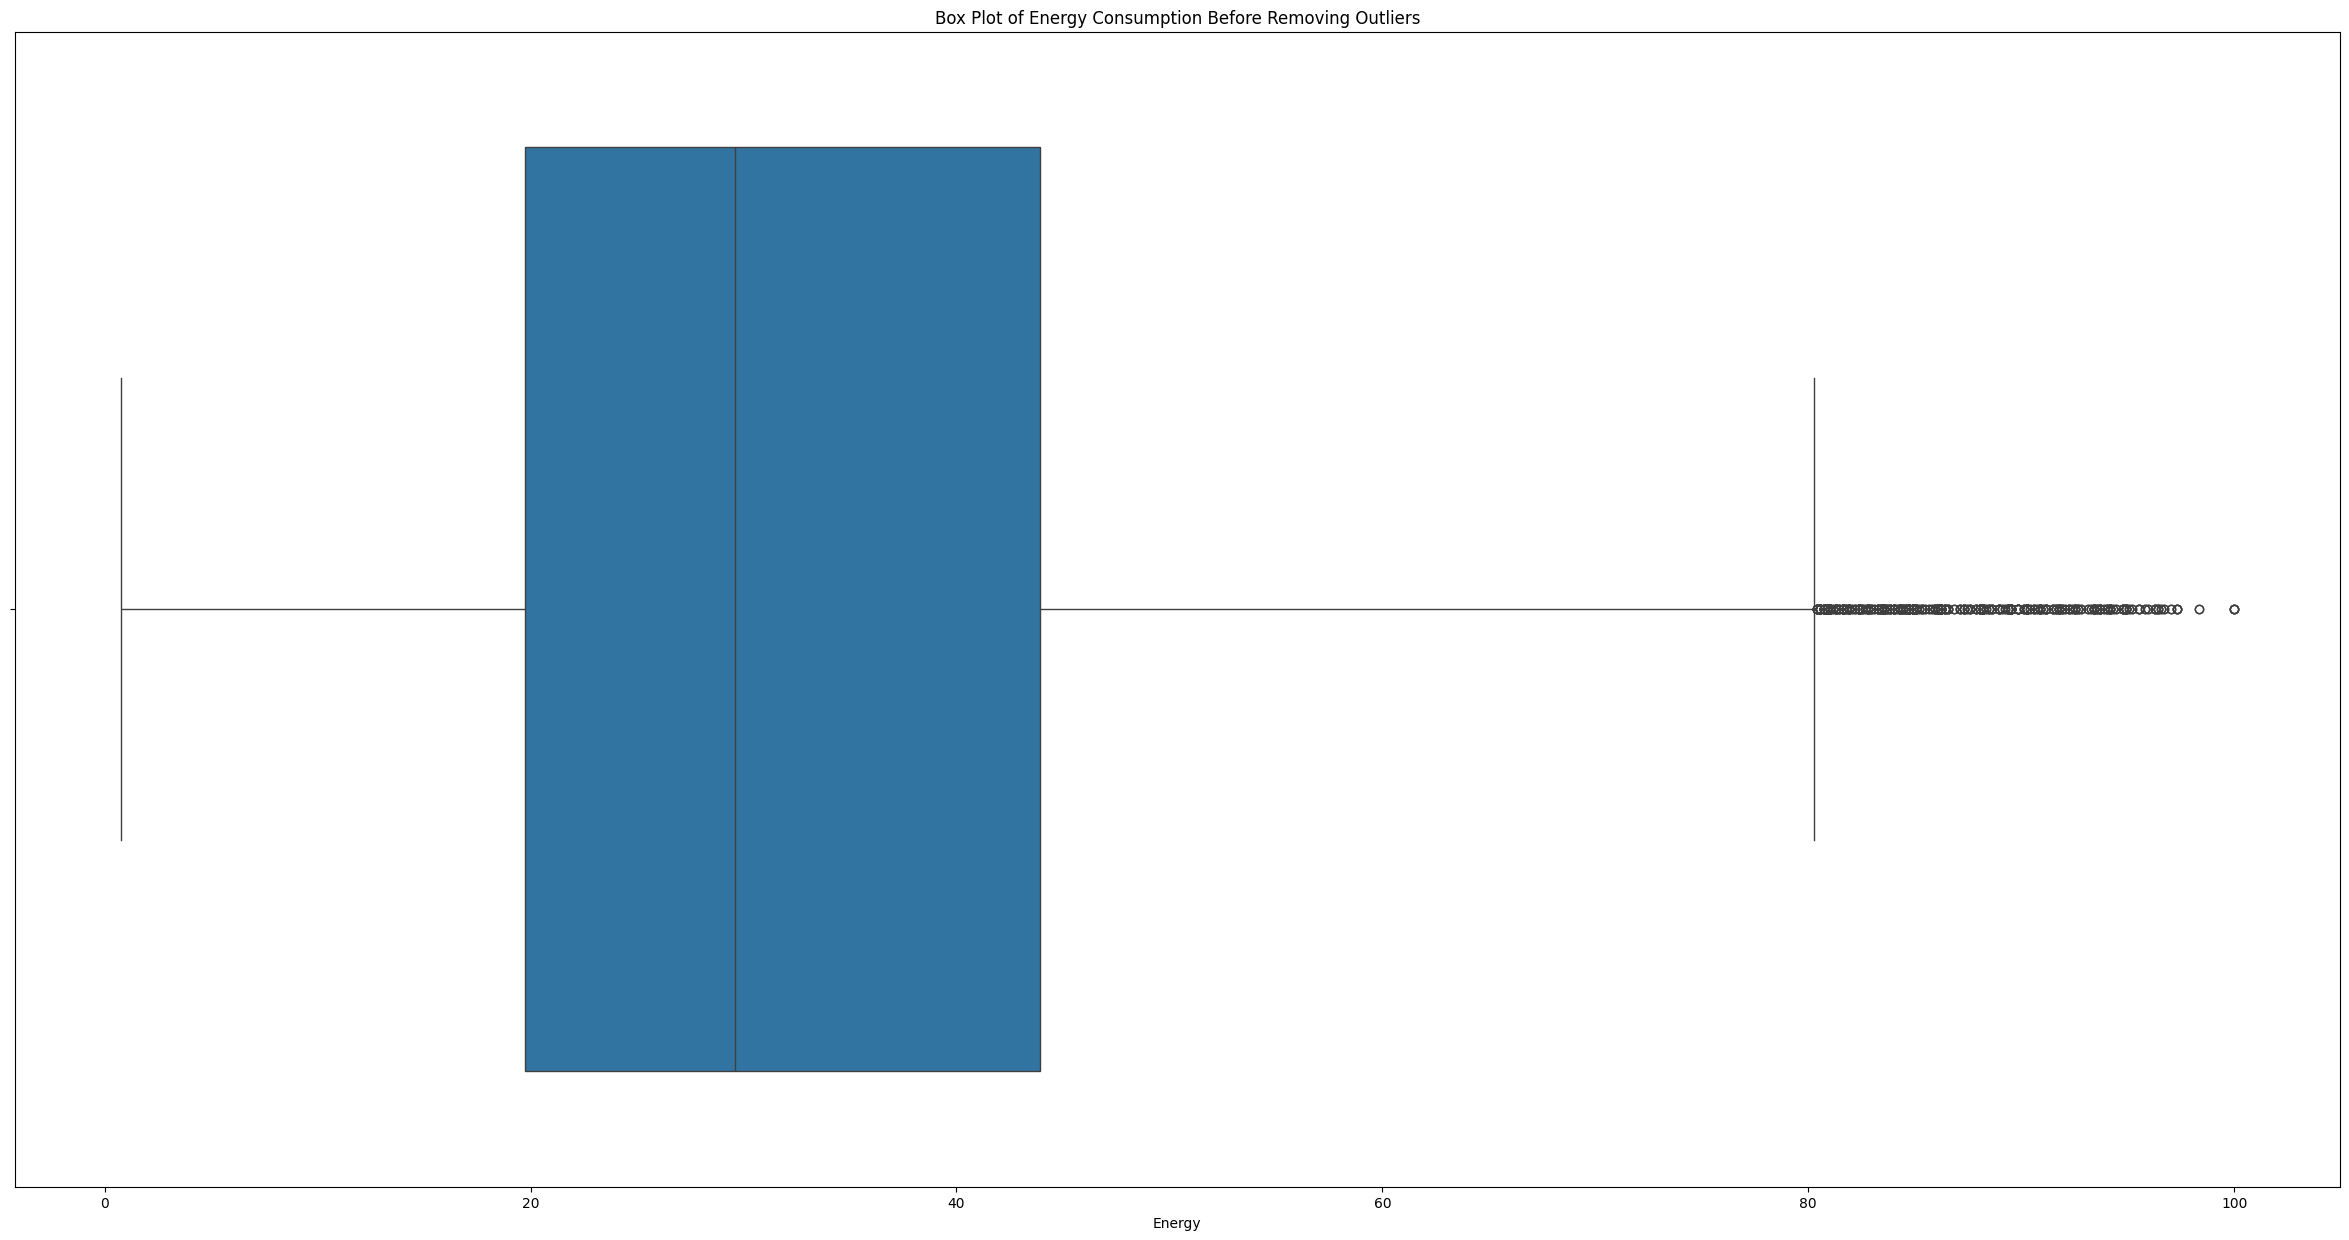

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'Energy' before removing outliers
plt.figure(figsize=(30, 15))
sns.boxplot(x=numeric_df['Energy'])
plt.title('Box Plot of Energy Consumption Before Removing Outliers')
plt.show()


Explanation of Visualization: In the box plot, we  see the central box representing the IQR, the median as a line within the box, and any points beyond the "whiskers" representing outliers.



Step 4: Handling Outliers

Here, we decide to remove rows containing any outliers in the numeric data. This approach simplifies the dataset but be mindful of potentially losing valuable information.



In [20]:
mask = ~outliers.any(axis=1)
final_combined_data_cleaned = final_combined_data[mask]


Step 5: Visualization After Outlier Removal

After removing outliers, visualize the 'Energy' data again to confirm the effect of outlier removal.



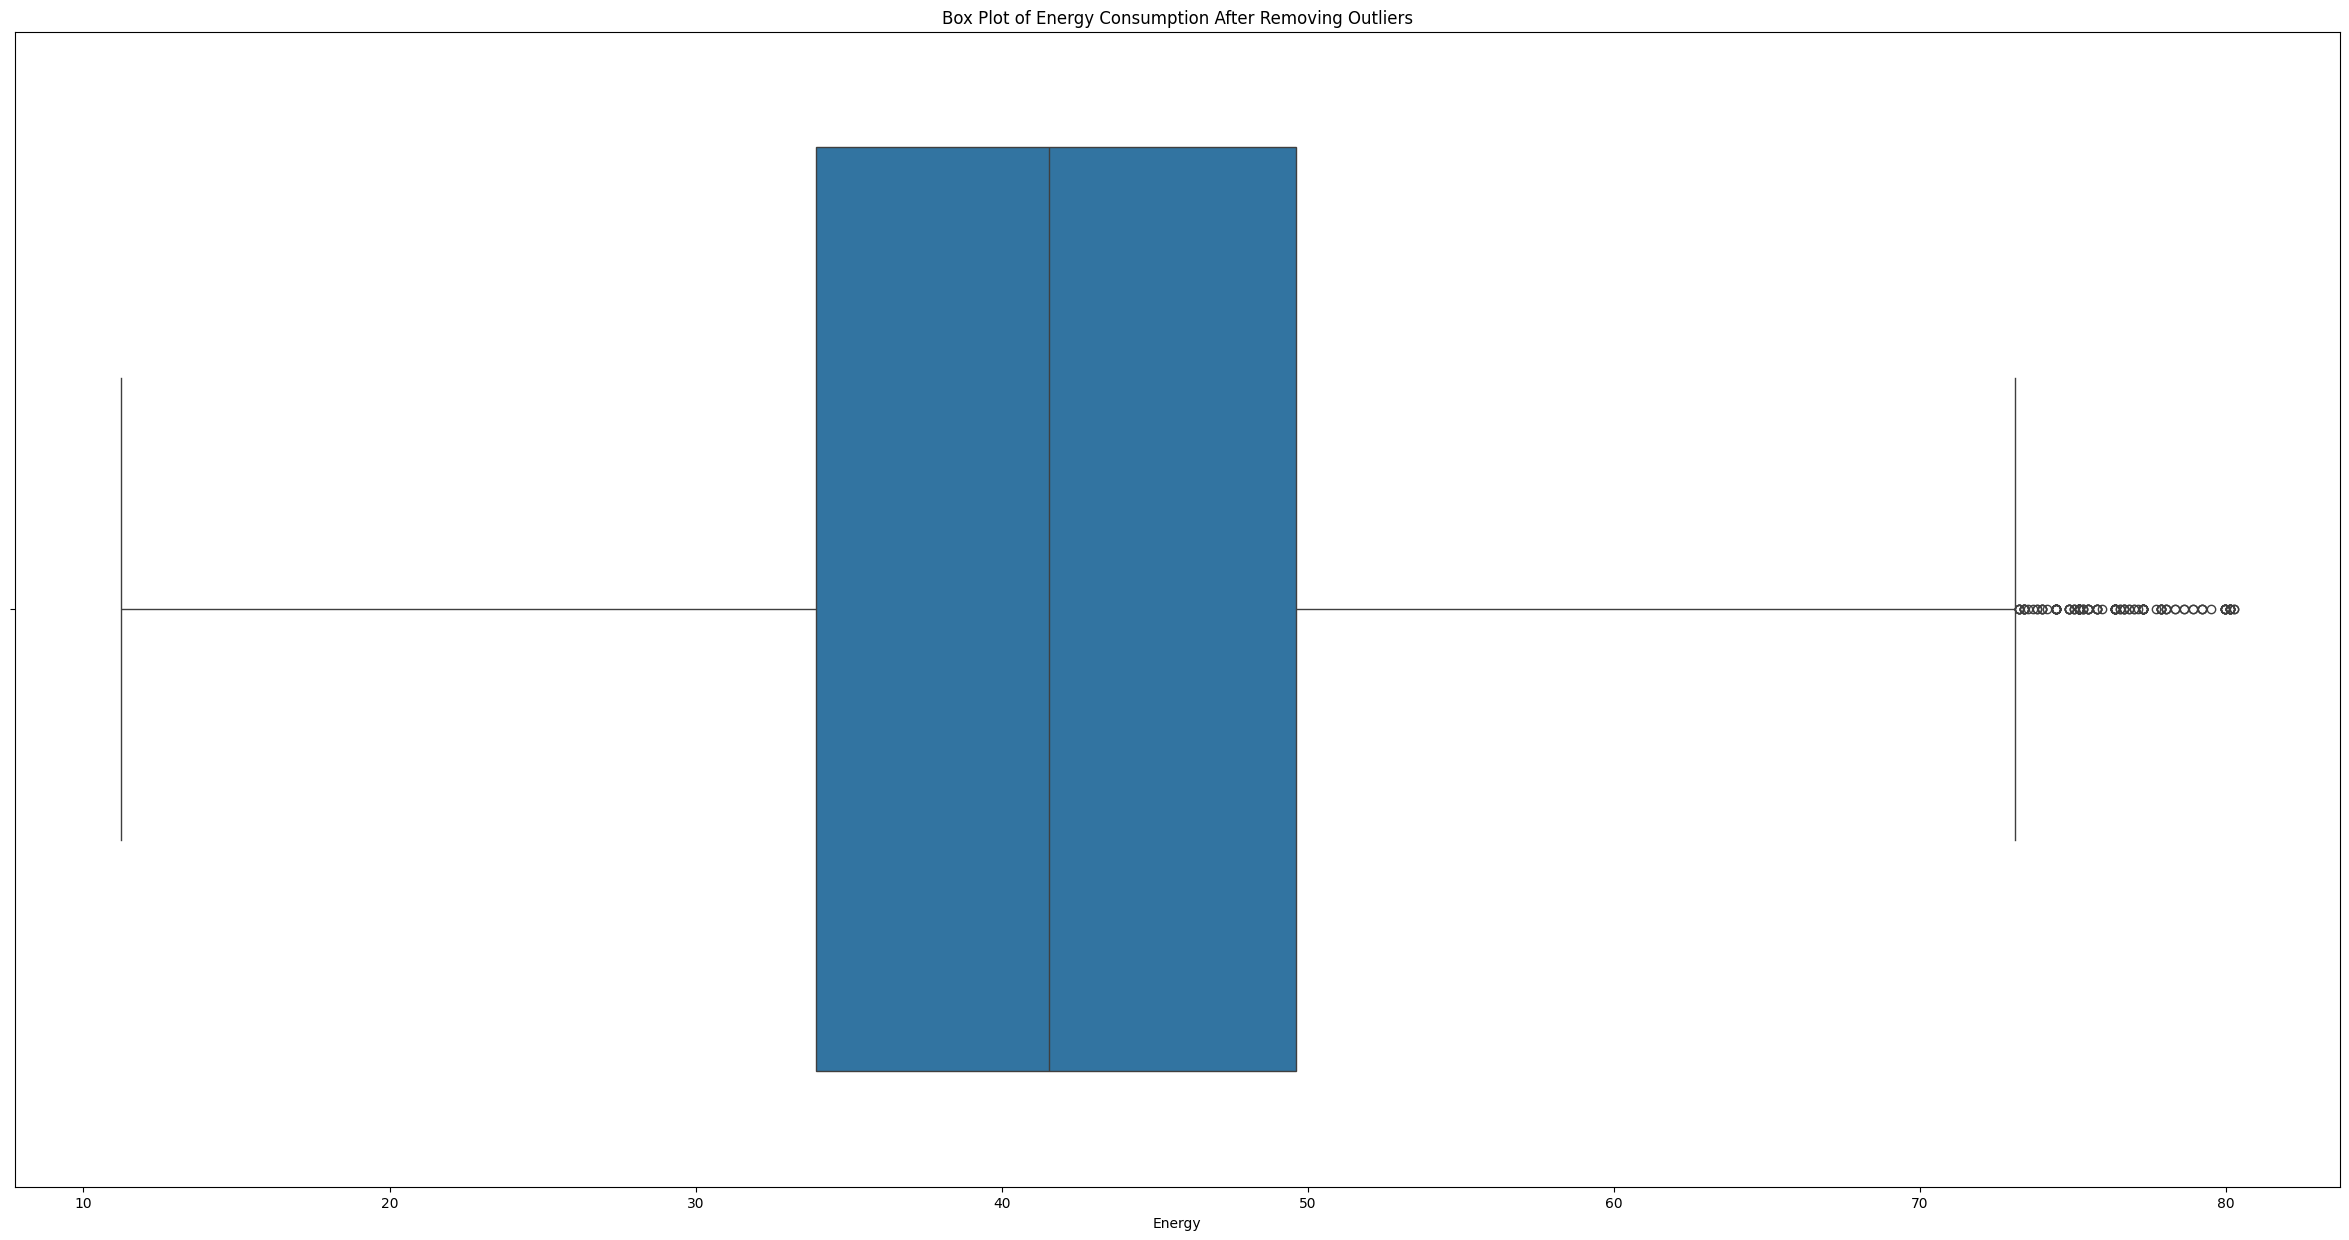

In [21]:
# Box plot for 'Energy' after removing outliers
plt.figure(figsize=(30, 15))
sns.boxplot(x=final_combined_data_cleaned.select_dtypes(include=[np.number])['Energy'])
plt.title('Box Plot of Energy Consumption After Removing Outliers')
plt.show()


Result: The new box plot should show a cleaner distribution, with fewer data points classified as outliers, depending on how stringent the outlier criteria were. The central tendency and spread of 'Energy' data are now easier to analyze without the extreme values skewing the distribution.



#Exploratory Data Analysis (EDA)
Let's dive into an Exploratory Data Analysis (EDA) focusing on the 'Energy' variable from our dataset.



#1. Plotting Energy Consumption Over Time for a Specific Base Station


In [22]:
final_combined_data['hour'] = final_combined_data['Time'].dt.hour
final_combined_data['day_of_week'] = final_combined_data['Time'].dt.dayofweek


<ipython-input-23-261568b0b0b9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_bs_data['formatted_hour'] = pd.to_datetime(specific_bs_data['hour'], format='%H').dt.strftime('%I %p')


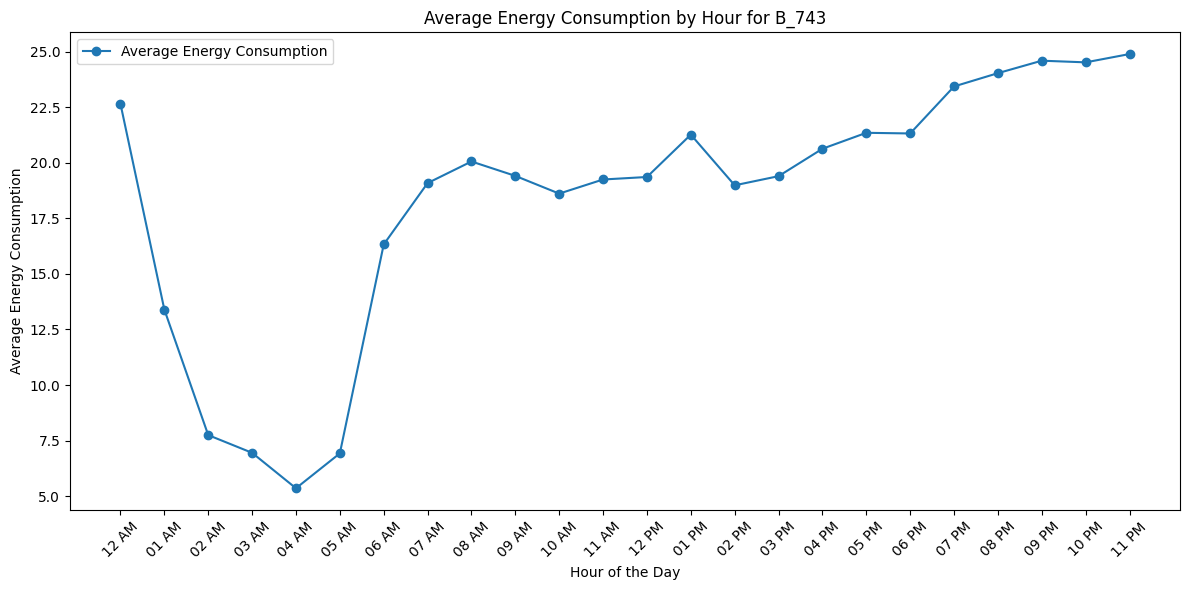

<ipython-input-23-261568b0b0b9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_bs_data['formatted_hour'] = pd.to_datetime(specific_bs_data['hour'], format='%H').dt.strftime('%I %p')


<ipython-input-23-261568b0b0b9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_bs_data['formatted_hour'] = pd.to_datetime(specific_bs_data['hour'], format='%H').dt.strftime('%I %p')


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_energy_consumption_by_hour(base_station_id, data):
    """
    Plots average energy consumption by hour (AM/PM format) for a specified base station ID,
    ensuring the order follows the natural progression of hours in a day.

    Parameters:
    - base_station_id: The identifier of the base station.
    - data: DataFrame containing the energy consumption data.
    """
    if base_station_id in data['BS'].unique():
        specific_bs_data = data[data['BS'] == base_station_id]

        if not specific_bs_data.empty:
            # Convert 'hour' to datetime to format it in AM/PM
            specific_bs_data['formatted_hour'] = pd.to_datetime(specific_bs_data['hour'], format='%H').dt.strftime('%I %p')

            # Group by the new formatted hour and calculate average energy consumption
            hourly_energy = specific_bs_data.groupby('formatted_hour')['Energy'].mean().reset_index()

            # Ensure the hours are in the correct order
            hours_order = pd.date_range("00:00", "23:00", freq="H").strftime('%I %p').tolist()
            hourly_energy['formatted_hour'] = pd.Categorical(hourly_energy['formatted_hour'], categories=hours_order, ordered=True)
            hourly_energy_sorted = hourly_energy.sort_values('formatted_hour')

            plt.figure(figsize=(12, 6))
            plt.plot(hourly_energy_sorted['formatted_hour'], hourly_energy_sorted['Energy'], label='Average Energy Consumption', marker='o')
            plt.title(f'Average Energy Consumption by Hour for {base_station_id}')
            plt.xlabel('Hour of the Day')
            plt.ylabel('Average Energy Consumption')
            plt.xticks(rotation=45)
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for base station {base_station_id}.")
    else:
        print(f"Base station {base_station_id} not found in the dataset.")

# Example usage
base_stations = ['B_743', 'B_233', 'B_456']
for bs_id in base_stations:
    plot_energy_consumption_by_hour(bs_id, final_combined_data)


#2. Visualizing Load vs. Energy Consumption
To explore the relationship between cell load and energy consumption, we can create a scatter plot. This visualization can help identify if higher loads correlate with higher energy consumption.



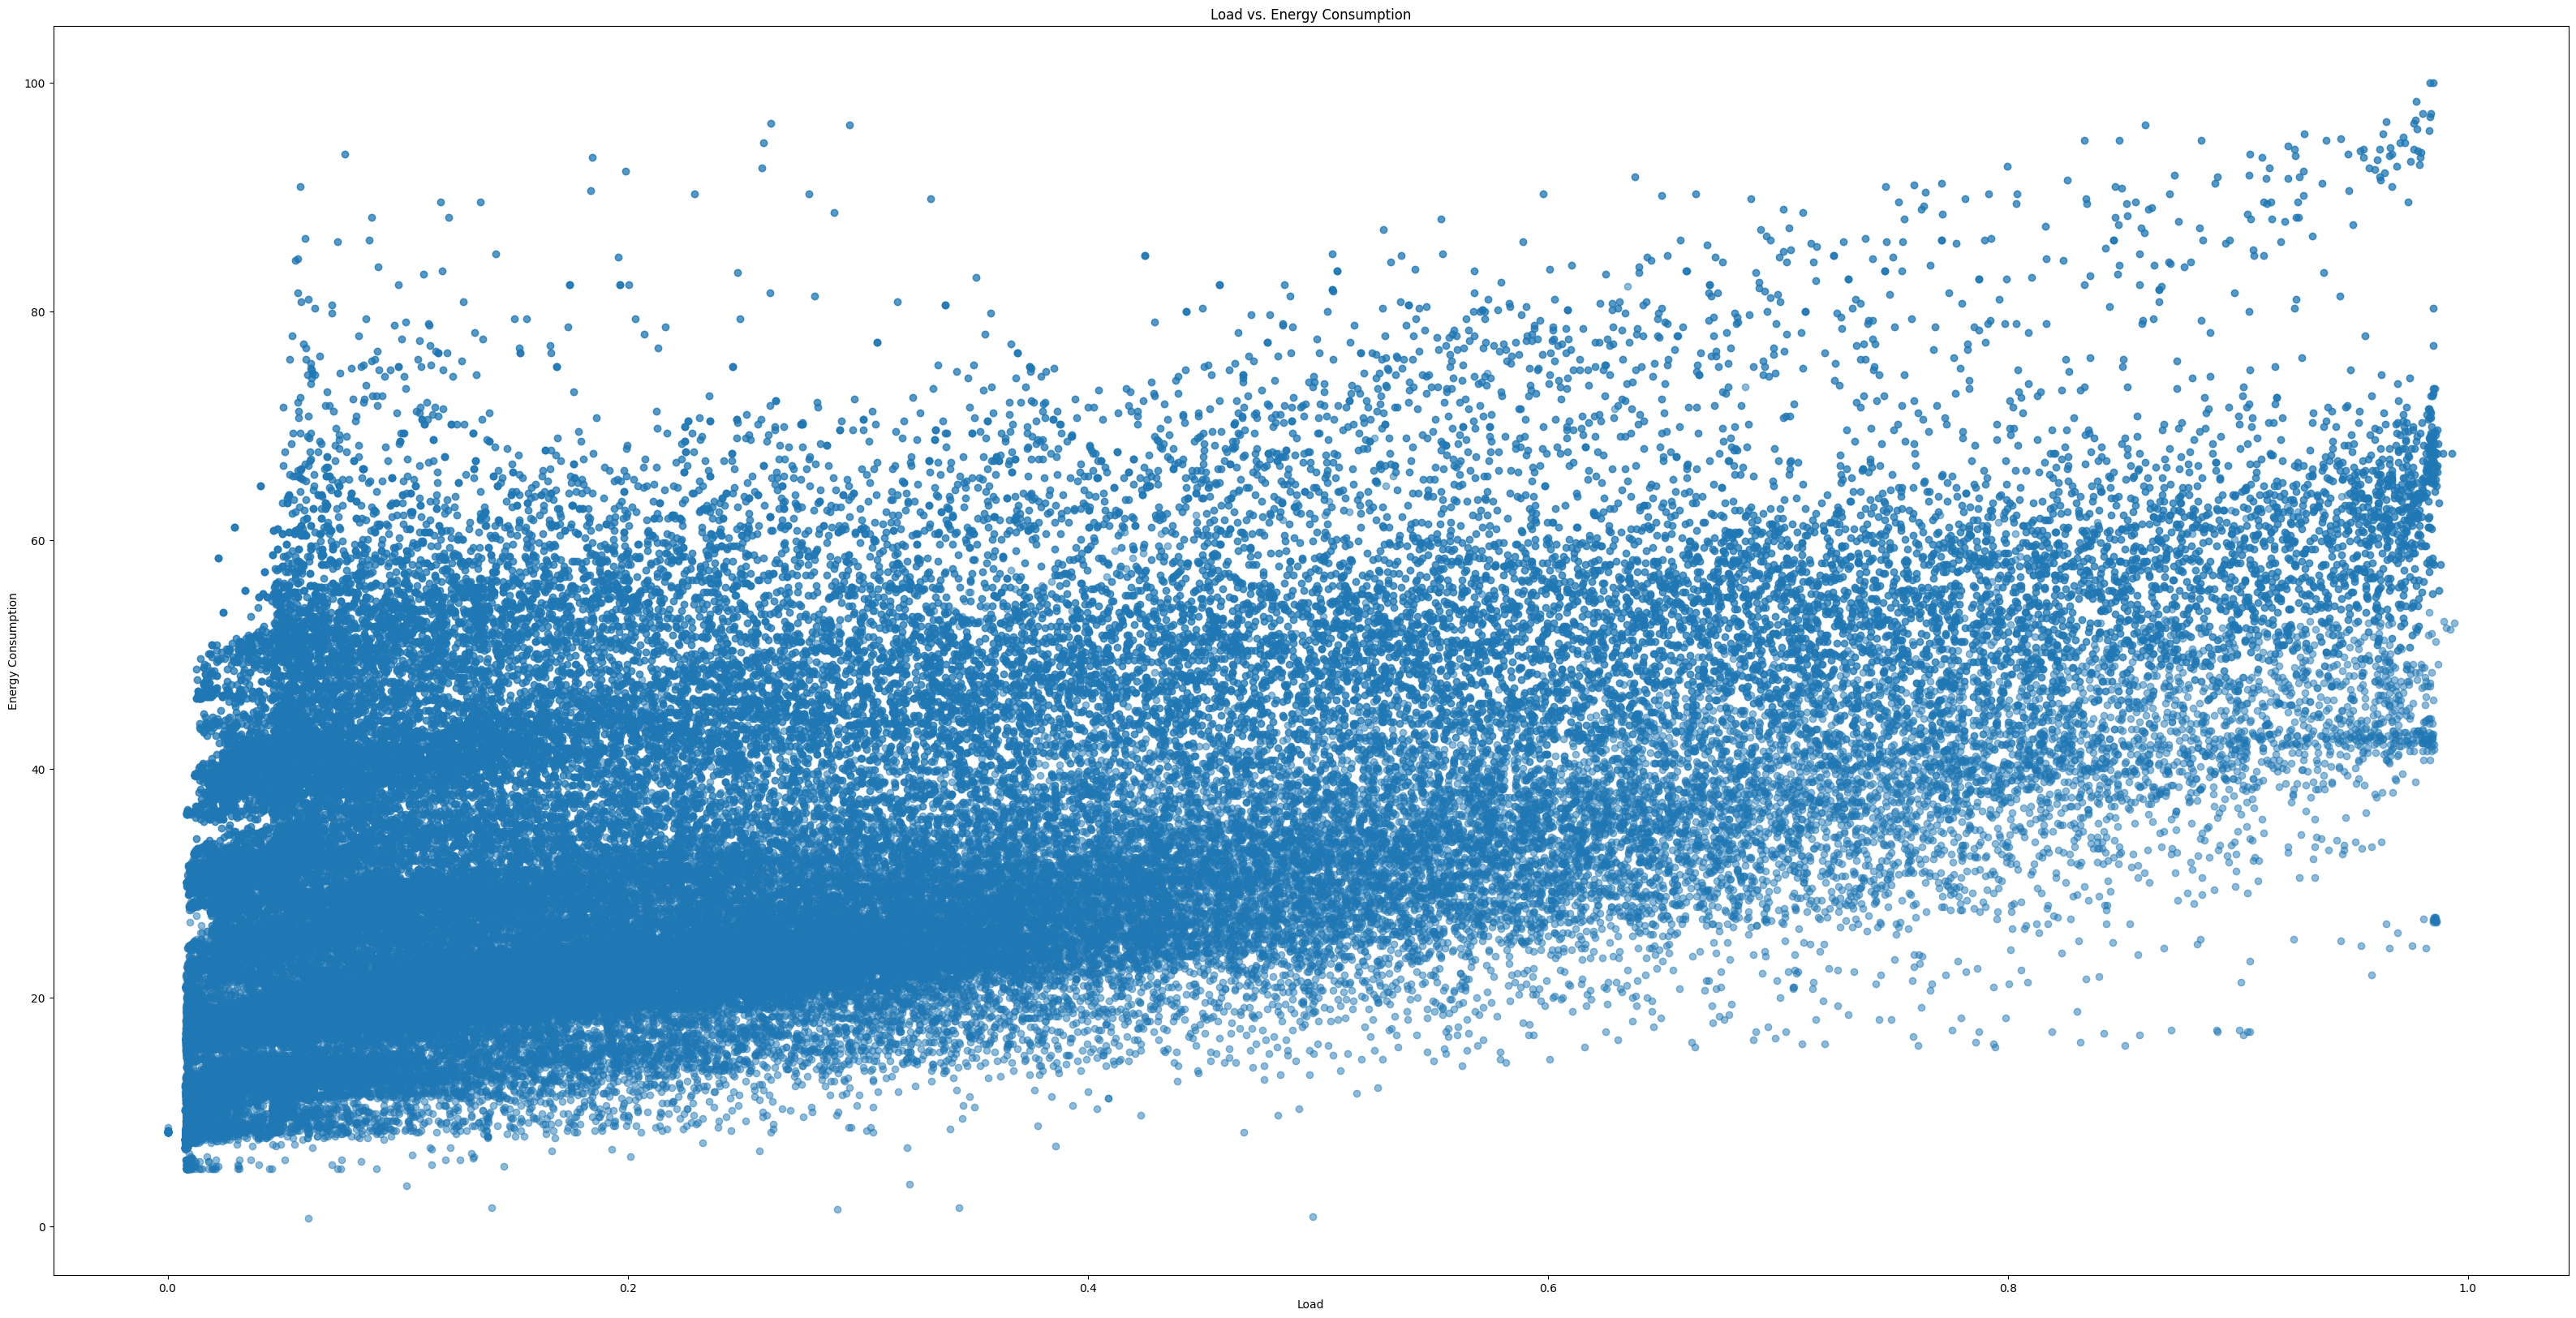

In [24]:
plt.figure(figsize=(40, 20))
plt.scatter(final_combined_data['load'], final_combined_data['Energy'], alpha=0.5)
plt.title('Load vs. Energy Consumption')
plt.xlabel('Load')
plt.ylabel('Energy Consumption')
plt.show()


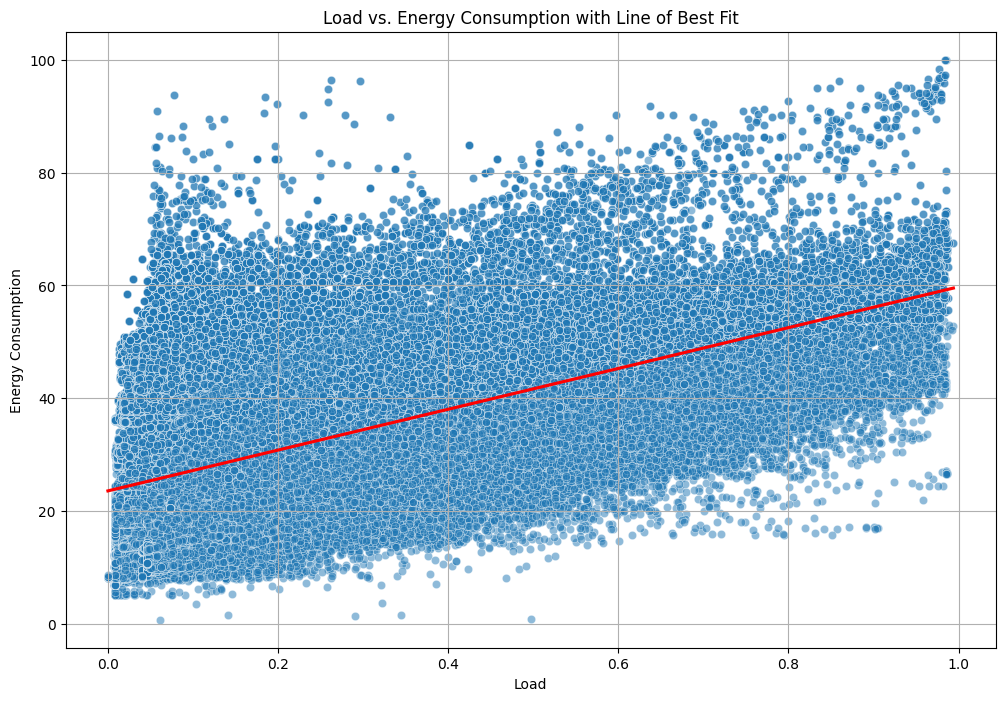

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='load', y='Energy', data=final_combined_data, alpha=0.5)

# Add a line of best fit
sns.regplot(x='load', y='Energy', data=final_combined_data, scatter=False, color='red')

plt.title('Load vs. Energy Consumption with Line of Best Fit')
plt.xlabel('Load')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()



#3. Distribution of Energy Consumption Across Different RU Types
For a simple visualization of the distribution of energy consumption across different Radio Unit (RU) Types, we can use a bar plot to display the average energy consumption for each RU Type. This approach provides a straightforward comparison of mean values across categories of RU type .




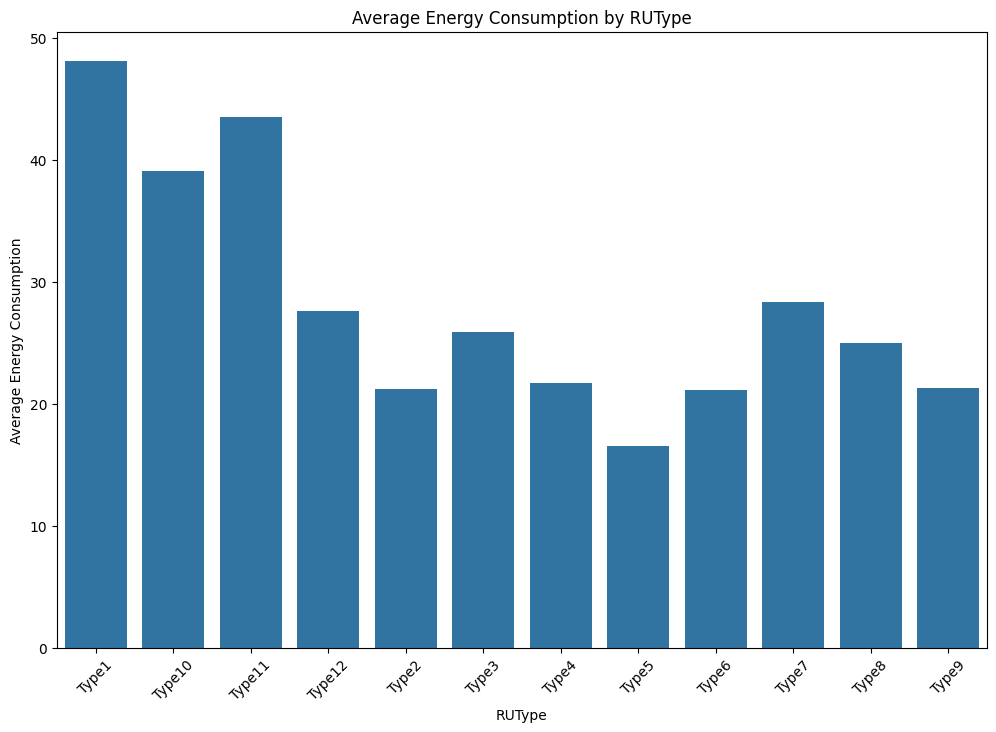

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean energy consumption for each RUType
mean_energy_by_rutype = final_combined_data.groupby('RUType')['Energy'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='RUType', y='Energy', data=mean_energy_by_rutype)
plt.title('Average Energy Consumption by RUType')
plt.xlabel('RUType')
plt.ylabel('Average Energy Consumption')
plt.xticks(rotation=45)
plt.show()


#4. Energy saving methods activation
Incorporating energy-saving methods activation data into our project involves analyzing which energy-saving features are activated and for how long. This information can be critical for understanding energy consumption patterns and identifying opportunities for further optimization.




Total Activation Duration:
ESMode1    3868.201389
ESMode2    3734.168611
ESMode3      12.857202
ESMode4       0.000000
ESMode5       1.398582
ESMode6    5069.654784
dtype: float64

Activation Counts:
ESMode1    4798
ESMode2    4896
ESMode3     276
ESMode4       0
ESMode5       3
ESMode6    6942
dtype: int64


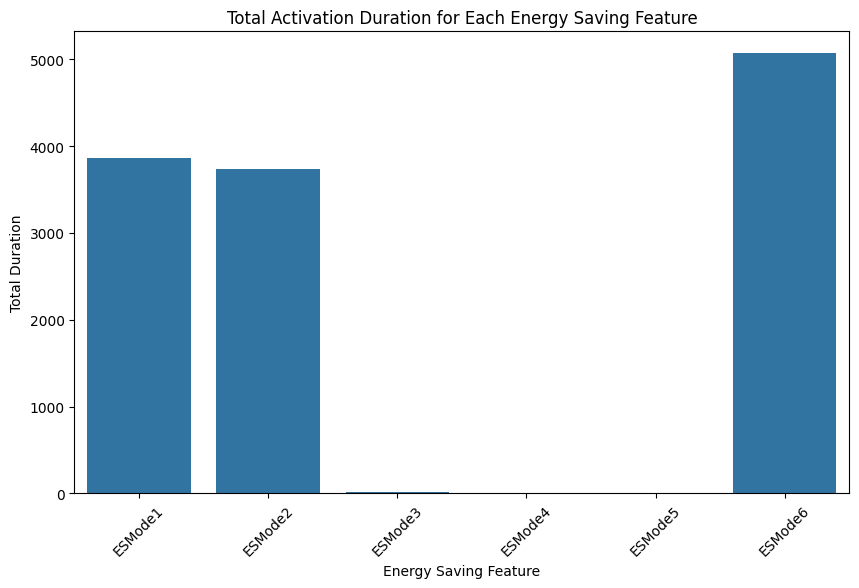

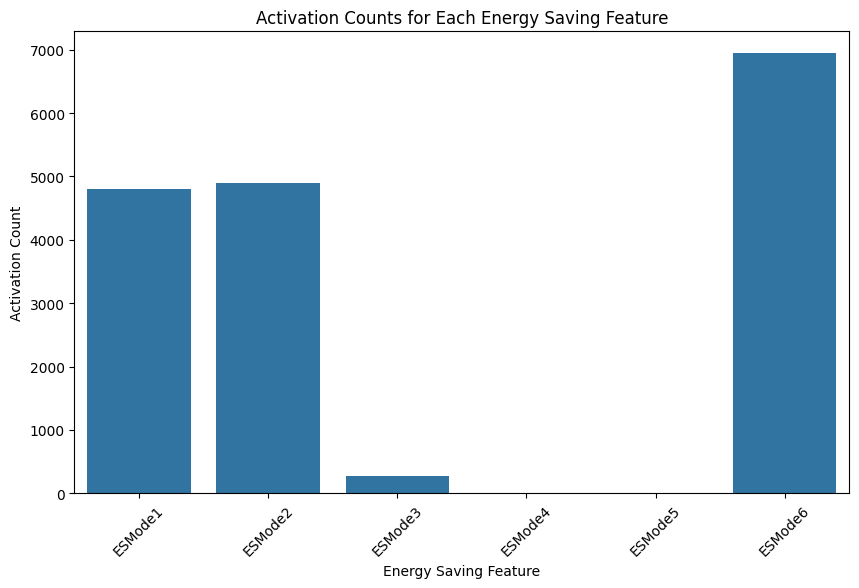

In [27]:
# Example: Ensuring no missing values in energy-saving features columns
energy_saving_features = ['ESMode1', 'ESMode2', 'ESMode3', 'ESMode4', 'ESMode5', 'ESMode6']
final_combined_data[energy_saving_features] = final_combined_data[energy_saving_features].fillna(0)
# Summarize the total activation duration for each energy-saving feature
total_duration = final_combined_data[energy_saving_features].sum()

# Count how many times each feature was activated (assuming a non-zero value indicates activation)
activation_counts = (final_combined_data[energy_saving_features] > 0).sum()

print("Total Activation Duration:")
print(total_duration)
print("\nActivation Counts:")
print(activation_counts)
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting total activation duration for each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=total_duration.index, y=total_duration.values)
plt.title('Total Activation Duration for Each Energy Saving Feature')
plt.xlabel('Energy Saving Feature')
plt.ylabel('Total Duration')
plt.xticks(rotation=45)
plt.show()

# Plotting activation counts for each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=activation_counts.index, y=activation_counts.values)
plt.title('Activation Counts for Each Energy Saving Feature')
plt.xlabel('Energy Saving Feature')
plt.ylabel('Activation Count')
plt.xticks(rotation=45)
plt.show()


checking if ESMode4 columns in our final combined dataset (final_combined_data) are entirely composed of zeros

In [28]:
# Check if all values in ESMode4 are 0
if final_combined_data['ESMode4'].eq(0).all():
    # Drop ESMode4 column
    final_combined_data.drop('ESMode4', axis=1, inplace=True)
    print("ESMode4 column was dropped as it contained only zeros.")
else:
    print("ESMode4 contains non-zero values; column was not dropped.")


ESMode4 column was dropped as it contained only zeros.


#Correlation Heatmap
Understanding how different features correlate with energy consumption and with each other:



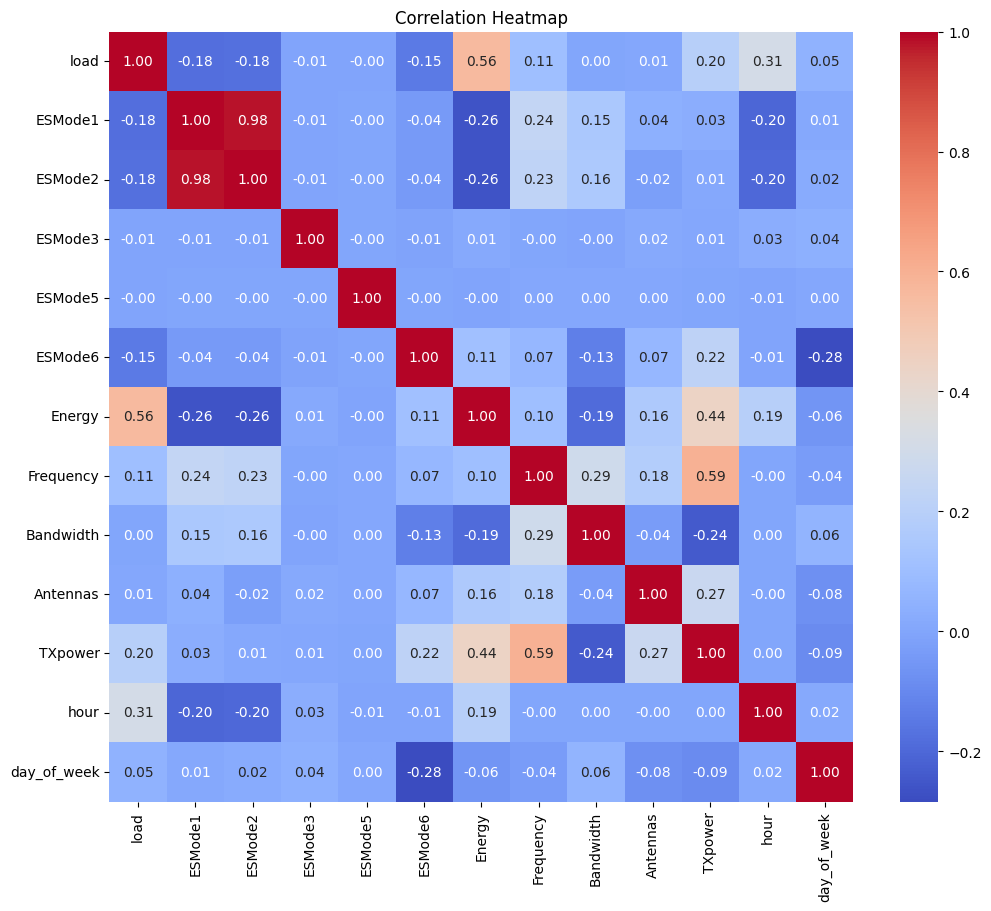

In [30]:
numeric_data = final_combined_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



Mathematical Formula of Pearson Correlation Coefficient :
The Pearson correlation coefficient r between two variables X and Y is calculated as:



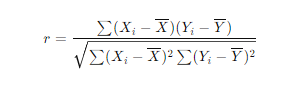

where:

X
i and
Y
i
  are the individual sample points indexed with
i,
‾
X
  and
‾
Y
  are the means (average values) of
X and
Y respectively,
The numerator,
 represents the covariance between
X and
Y. It measures how much
X and
Y vary together.
The denominator is the product of the standard deviations of
X and
Y, representing the spread of each variable individually. It is the square root of the sum of the squared deviations from the mean for
X and
Y.



#Feature Engineering
Based on initial insights from EDA, creating new features that might better capture the factors affecting energy consumption:



Time Features

Creating time-based features to capture potential temporal patterns in energy consumption:



In [31]:
final_combined_data['hour'] = final_combined_data['Time'].dt.hour
final_combined_data['day_of_week'] = final_combined_data['Time'].dt.dayofweek


#Preparing Data for Modeling
After feature engineering, preparing our dataset for modeling, including handling categorical variables and splitting the data:

Encoding Categorical Variables and Splitting the Data


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identifying categorical and numerical features
categorical_features = ['RUType', 'Mode']
numerical_features = ['Frequency', 'Bandwidth', 'Antennas', 'TXpower', 'hour', 'day_of_week', 'load', 'ESMode1', 'ESMode2', 'ESMode3', 'ESMode5', 'ESMode6','load']

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# Splitting the dataset
X = final_combined_data.drop(['Energy', 'BS', 'Time', 'CellName_x', 'CellName_y'], axis=1)
y = final_combined_data['Energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying transformations
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


#Model Training and Evaluation
We will train a model using the prepared data. we start with a simple model and evaluate its performance:



In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Training a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_prepared, y_train)

# Making predictions
y_pred = rf_model.predict(X_test_prepared)



# Evaluating the model
Mean Squared Error (MSE):

In [34]:

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 20.403257774504333


MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

Interpretation: An MSE of 20.45 means that, on average, the squared difference between the predicted energy consumption and the actual energy consumption is 20.47. The lower the MSE, the better the model's performance. However, since MSE is in squared units of the target variable, it can sometimes be hard to interpret directly.


Root Mean Squared Error (RMSE):

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.9177594607629302


R-squared (R²) is the coefficient of determination that measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

Interpretation: An R² of 0.917 indicates that 91.8% of the variance in the energy consumption can be explained by the model's inputs. R² values range from 0 to 1, where higher values indicate a better fit between the model and the actual data. An R² of 0.918 is generally considered excellent, suggesting your model explains a large portion of the variation in energy consumption.


Mean Absolute Error (MAE):

In [36]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 3.1104285898487016


MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.

Interpretation: An MAE of 3.11 means that, on average, the model's predictions are off by 3.12 units from the actual energy consumption values. Unlike MSE, MAE is in the same units as the target variable, making it easier to interpret.



Root Mean Squared Error (RMSE):

In [37]:
from math import sqrt
rmse = sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 4.516996543556828


RMSE is the square root of the mean of the squared differences between predicted and actual values. It's a measure of the standard deviation of the prediction errors.

Interpretation: An RMSE of 4.52 indicates the standard deviation of the residuals is 4.52 units. Like MAE, RMSE is in the same units as the target variable, but it gives a higher weight to larger errors. The RMSE value suggests the typical error magnitude in your model's predictions.


Mean Absolute Percentage Error (MAPE):

In [38]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')


Mean Absolute Percentage Error: 9.994166350808435%


MAPE measures the size of the error in percentage terms. It is the average of the absolute percentage errors of the predictions.

Interpretation: A MAPE of 10% means that the model's predictions are, on average, 10% off from the actual values. MAPE offers an intuitive understanding of prediction accuracy in terms of percentages, which can be particularly helpful for stakeholders to grasp the model's performance.


Residual Analysis :

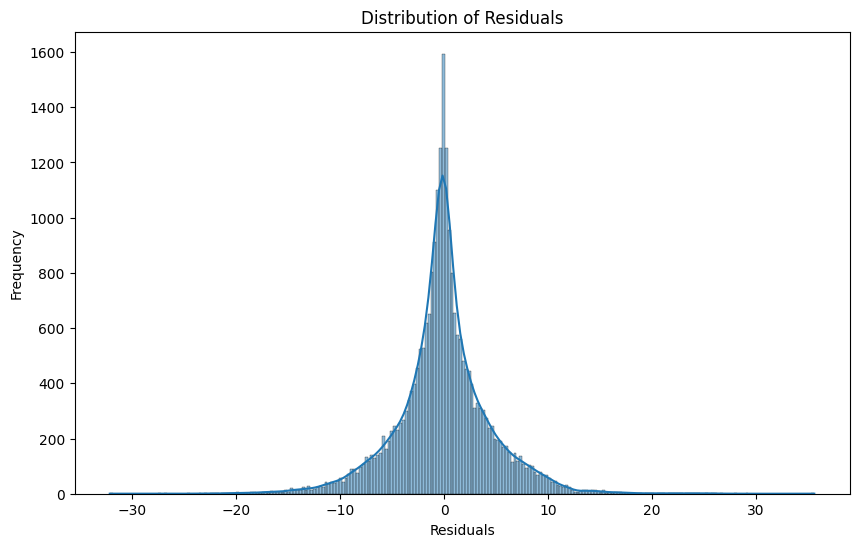

In [39]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Interpretation: Ideally, residuals should be randomly distributed around zero. Patterns or skewness in the residuals can indicate issues with the model fit.


Residual analysis is a technique used in statistics to assess how well a model fits the data. When you make a prediction with a model, there are always some differences between the predicted values and the actual values. These differences are called residuals. Essentially, a residual is the error in the prediction, or how much the prediction "misses" the actual value.



#Feature Importance Analysis
After training our model, analyzing which features are most influential in predicting energy consumption:



In [40]:
feature_importances = rf_model.feature_importances_
# Adjust the next line if you modified the feature names or preprocessing
features = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df.head(10))


         Feature  Importance
13  RUType_Type1    0.608342
12          load    0.115405
6           load    0.109070
2       Antennas    0.055873
4           hour    0.035406
3        TXpower    0.022694
5    day_of_week    0.014257
11       ESMode6    0.007029
7        ESMode1    0.005888
21  RUType_Type7    0.005525


#Interpretation of Results

1.Mean Squared Error (MSE):

 The MSE is a measure of the quality of our model; it represents the average squared difference between the actual observed values and the values predicted by the model. An MSE of 20.466850584913928 means that, on average, the model's predictions deviate from the actual energy consumption values by the square root of this value (approximately 4.523 units )

2.Feature Importance:

*RUType_Type1:

 This feature has the highest importance score (approximately 60.8%), indicating that the type of radio unit plays a critical role in predicting energy consumption. This suggests that certain RU types may be significantly more or less energy-efficient.

*load:

 The load on the cell accounts for about 11% of the importance, highlighting its significant impact on energy consumption. Higher load likely increases energy consumption.

*Antennas, TXpower, hour, day_of_week:

 These features have varying degrees of importance, suggesting that the number of antennas, transmit power, and temporal factors (time of day, day of the week) also influence energy consumption to some extent.


*ESMode1 to ESMode6:

The energy-saving modes have varying levels of importance, with ESMode6 and ESMode1 being the most relevant among them, though their overall contributions are relatively small. This indicates that while energy-saving modes impact energy consumption, their effect is not as pronounced as factors like RU type or load.

